# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

In [3]:
df = pd.read_csv("food_claims_2212.csv")

In [4]:
display(df.head())
display(df.shape)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


(2000, 8)

In [5]:
display(df.isna().sum())
display(df.dtypes)
display(df.claim_id.duplicated().sum())
# claim id matches table

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

claim_id                  int64
time_to_close             int64
claim_amount             object
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object

0

In [6]:
df[df.isna().any(axis=1)]

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
32,33,184,R$ 26030.25,NaN,NATAL,7,True,unknown
112,113,359,R$ 50309.9,NaN,FORTALEZA,13,False,unknown
129,130,108,R$ 5122.45,3864.18,RECIFE,2,NaN,meat
173,174,322,R$ 36079.44,NaN,NATAL,12,False,meat
178,179,183,R$ 28196.45,NaN,SAO LUIS,7,True,unknown
...,...,...,...,...,...,...,...,...
1834,1835,247,R$ 45768.2,NaN,NATAL,9,False,unknown
1898,1899,218,R$ 38459.17,NaN,NATAL,11,False,meat
1961,1962,169,R$ 35285.98,NaN,NATAL,9,False,unknown
1968,1969,181,R$ 35565.18,NaN,RECIFE,8,True,unknown


In [7]:
df.time_to_close.sort_values().head(1)
#time to close vals are all int and positive

356    76
Name: time_to_close, dtype: int64

In [8]:
pd.options.display.float_format = '{:,.2f}'.format
df.claim_amount = df.claim_amount.str.strip("R$ ").astype(np.float64).round(2)
display(df.claim_amount)
#removed "R$ " from entries, changed from str to float
#no missing values, now matches table

0      74,474.55
1      52,137.83
2      24,447.20
3      29,006.28
4      19,520.60
          ...   
1995   28,982.30
1996    5,188.44
1997   11,975.85
1998   23,516.28
1999    8,051.40
Name: claim_amount, Length: 2000, dtype: float64

In [9]:
df.claim_amount.min()

1637.94

In [10]:
df.amount_paid = df.amount_paid.fillna(df.amount_paid.median())
df.iloc[32]
#amount paid na replaced with median, all values now match

claim_id                      33
time_to_close                184
claim_amount           26,030.25
amount_paid            20,105.70
location                   NATAL
individuals_on_claim           7
linked_cases                True
cause                    unknown
Name: 32, dtype: object

In [11]:
display(df.location.value_counts())
#location matches table, no missing or extraneous values

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64

In [12]:
df.individuals_on_claim.min()
#no missing values, min is 1, matches table

1

In [13]:
df.linked_cases = df.linked_cases.fillna(False)
df.linked_cases.value_counts()
#filled na with false, all entries are bool, matches table

False    1519
True      481
Name: linked_cases, dtype: int64

In [14]:
display(df.cause.value_counts())
# extra values: VEGETABLES, Meat
df.cause = df.cause.str.replace("VEGETABLES", "vegetable").str.lower().str.strip(" ").value_counts()
# changed VEGETABLES to vegetable, and " Meat" to "meat". matches table

meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64

## Info by Column:

### claim_id
This column had no missing or duplicated values, and all values are integers. No changes were necessary to make these values match the requirements.

### time_to_close
This column had no missing values and all values are positive integers. No changes were necessary.

### claim_amount
This column had no missing data. However, the values were all given as strings in the form "R\$ \[amount]" denoting the Brazilian currency. The beginning "R\$ " was removed, amounts changed to float type, and pandas was formatted to force two decimal places as some rounding removed the trailing zero (so that $123.40$ showed up as $123.4$). Now all entries are of the form $xxx.yy$ and match the form given in the table.

### amount_paid
This column had $36$ missing values, which were replaced with the median of the column: $20,105.70$. After this change, all values match the table.

### location
This column had no missing values. The only values were “RECIFE”, “SAO LUIS”,
“FORTALEZA”, and “NATAL”; so everything matches the table without need for change.

### individuals_on_claim
This column has no missing values, all values were integers (no half-people), and the minimum value was $1$, so no changes were necessary.

### linked_cases
This column had $26$ missing values, all of which were replaced with "False". After this change, all values were True or False, and this column matches the desired format.

### cause
This column had no missing values, but did have unwanted values "VEGETABLES" and " Meat" show up a combined total of $30$ times. These were changed to "vegetable" and "meat", respectively, and there were no issues with the "unknown" values, so this column is now in the correct format.

## Task 2

In [15]:
%matplotlib inline

In [16]:
loc_group = df.groupby("location")

In [17]:
loc_group.claim_id.count()

location
FORTALEZA    311
NATAL        287
RECIFE       885
SAO LUIS     517
Name: claim_id, dtype: int64

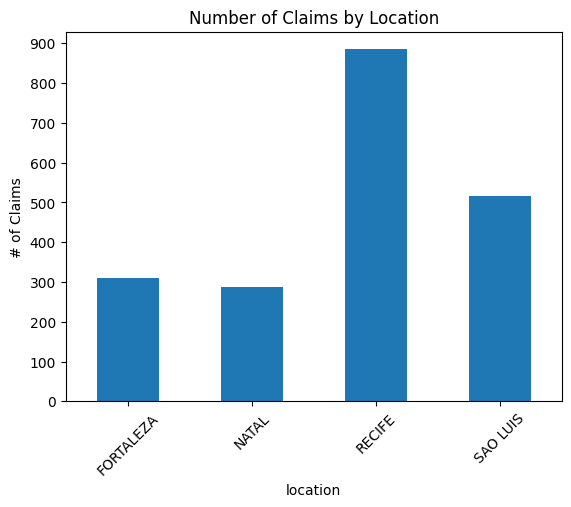

In [18]:
loc_plot = loc_group.claim_id.count().plot(kind="bar", yticks=np.arange(0,1000,100), rot=45, title="Number of Claims by Location", ylabel="# of Claims")
fig = loc_plot.get_figure()
#fig.savefig("loc_barplot.png", bbox_inches="tight")

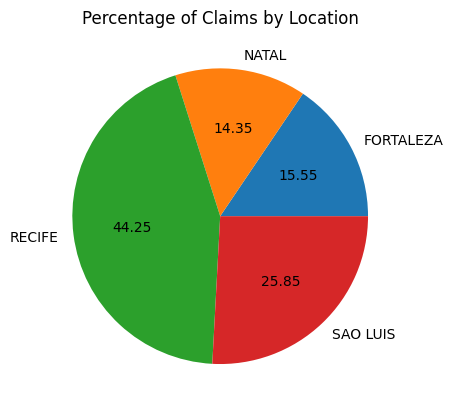

<Figure size 640x480 with 0 Axes>

In [19]:
plt.clf()
plt.pie(loc_group.claim_id.count(), labels=loc_group.claim_id.count().index, autopct="%.2f")
plt.title("Percentage of Claims by Location")
#plt.savefig("loc_pieplot.png", bbox_inches="tight")
plt.show()
plt.clf()

## Claims by location

As shown in the following bar plot, the most claims ($885$ out of $2000$) came from Recife. Further, as we can see in the pie chart, the observations are balanced between Fortaleza and Natal. However, Sao Luis has a higher number of observations, and Recife also distinguishes itself from the other locations by a significant margin.

![neat barplot that should load](loc_barplot.png)

![neat piechart that should load](loc_pieplot.png)

## Task 3

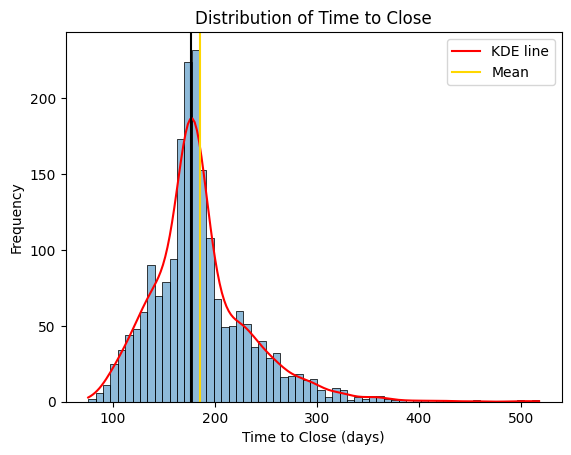

In [20]:
ax = sns.histplot(data=df, x="time_to_close", kde=True)
ax.lines[0].set_color("red")
meanline = plt.axvline(df.time_to_close.mean(), color="gold")
plt.xlabel("Time to Close (days)")
plt.ylabel("Frequency")
plt.title("Distribution of Time to Close")
plt.legend([ax.lines[0], meanline], ["KDE line", "Mean"])
#plt.savefig("close_histkde.png", bbox_inches="tight")
plt.axvline(177, color="black")
plt.show()

In [21]:
display(df.time_to_close.max())
display(df.time_to_close.min())
display(df.time_to_close.mean())
display(df[df.time_to_close < 186].time_to_close.count())

518

76

185.568

1218

## Distribution of Time to Close

When looking at all claims, the distribution is right skewed. More explicitly, the minimum time is $76$, and the max is $518$, with the average being approximately $186$. However, there are $1218$ entries where the time to close is less than the average, and the density has a peak around $177$. This information is shown in the following graph.

![](close_histkde.png)

As we can see the data peaks to the left of the mean, and trails off as the frequency of time to close observations decreases while the actual value of time to close grows past the peak.

## Task 4

In [22]:
loc_close = loc_group.time_to_close

<AxesSubplot:title={'center':'Avg Time to Close by Location'}, xlabel='location', ylabel='Average'>

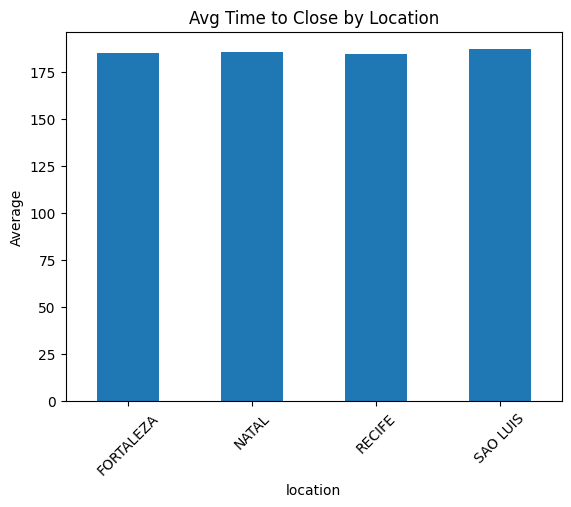

In [23]:
loc_close.mean().plot(kind="bar", ylabel="Average", rot=45, title="Avg Time to Close by Location")
#plt.savefig("avg_loc_close.png", bbox_inches="tight")

Text(0.5, 1.0, 'Scatterplot of Time to Close Colored by Location')

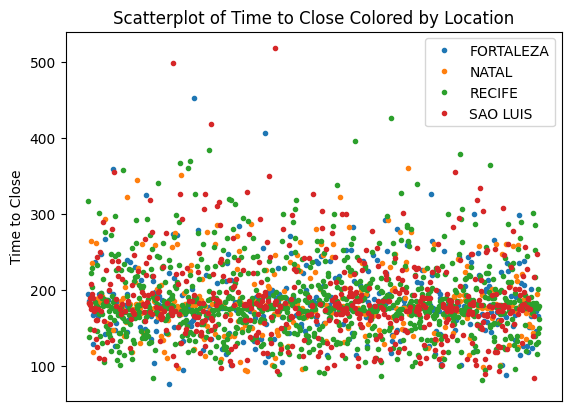

In [24]:
for loc, val in loc_group:
    plt.plot(val.claim_id, val.time_to_close, marker="o", markersize=3, linestyle="", label=loc)
plt.xticks([])
plt.xlabel("")
plt.ylabel("Time to Close")
plt.legend()
plt.title("Scatterplot of Time to Close Colored by Location")
#plt.savefig("loc_close_scatter.png", bbox_inches="tight")

Text(0, 0.5, 'Time to Close')

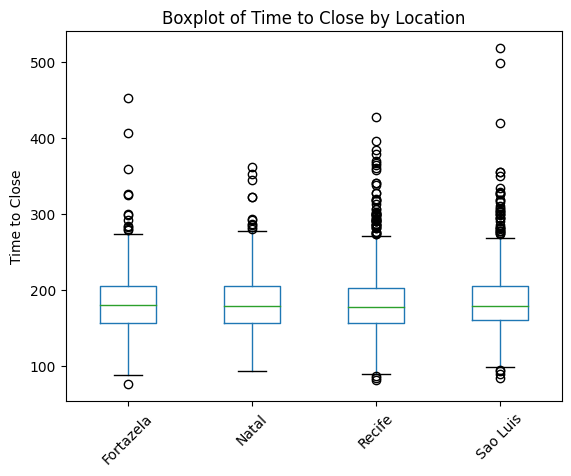

In [25]:
loc_group.boxplot(column="time_to_close", subplots=False, rot=45, grid=False)
plt.xticks([1,2,3,4], ["Fortazela", "Natal", "Recife", "Sao Luis"])
plt.title("Boxplot of Time to Close by Location")
plt.ylabel("Time to Close")
#plt.savefig("loc_close_box.png", bbox_inches="tight")

In [27]:
pg.anova(data=df, dv="time_to_close", between="location", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,location,"2,201.34",3,733.78,0.30,0.82,0.00
1,Within,"4,829,459.41",1996,"2,419.57",NaN,NaN,NaN


## Time to Close by Location

Although there was a large disparity in the number of claims by location, as shown in Task 2, analysis of the time to close (TTC) by location appears to be much more equal. Here we will look at two visualizations, one showing the average TTC by location and the other showing the median and quartiles of TTC.

![](avg_loc_close.png)
![](loc_close_box.png)

As we see, the averages are all around the same value. Further, even the median and first and third quartiles (shown in the boxplot) all appear to be roughly equal! Actual values are provided in the following table.

| Location  | Mean   | $Q_{1}$ | Median | $Q_{3}$ |
| ---       | ---    | ---     | ---    | ----    |
| Fortaleza | 185.31 | 157.00  | 180.00 | 205.50  |
| Natal     | 185.93 | 157.00  | 179.00 | 205.50  |
| Recife    | 184.61 | 157.00  | 178.00 | 203.00  |
| Sao Luis  | 187.17 | 157.00  | 179.00 | 205.00  |

Following up on the visualization, a one-way ANOVA test was run, which showed that there was no statistically significant difference in mean TTC between any locations ($F(3,1996)=.30$, $p=.82$).

In [31]:
loc_close.quantile(0.75)

location
FORTALEZA   205.50
NATAL       205.50
RECIFE      203.00
SAO LUIS    205.00
Name: time_to_close, dtype: float64

In [26]:
# undo float thing 
#pd.reset_option('display.float_format')

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam